## More Model Comparisons
Gradient boosting and adaboosting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
# Reading in data

data = pd.read_csv('/Users/Chris/Documents/Data/train.csv/train.csv')

In [13]:
# Train-test split

data_train, data_test = train_test_split(data.copy(deep=True), test_size=0.1, random_state=314,
                                          stratify=data['Cover_Type'])

In [14]:
# Definining the continuous variables (soil types and wilderness areas are the categorical variables)

contvars = data.columns[1:11]

# Definining the categorical variables (soil types and wilderness areas are the categorical variables)
catvars = data.columns[11:-1]

In [19]:
#dropping the irrelevant soils

data1 = data.copy(deep=True)
X = data1.drop(['Cover_Type'],axis=1)
y = data1['Cover_Type']


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Does PCA improve our models?
(Spoiler, it won't)

In [21]:
# Pipeline: scale -> pca(q)

for q in range (2,5): #iterating on pca dims
    pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(q))])

    fit = pipe.fit_transform(X[contvars]) #just doing pca on the contvars

    X_fit = pd.DataFrame(fit)
    dataaa = X[catvars]
    j=0
    while j<= q-1:
        dataaa[j] = X_fit[j]
        j+=1
    
    #test split
    X_train,X_test, y_train, y_test = train_test_split(dataaa,y,
                               shuffle = True,
                               random_state=314,
                               test_size=0.2)
    
    rf_accuracy = {}
    for i in range(1,5):
        rf = RandomForestClassifier(n_estimators = 100*i)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        rf_accuracy[100*i] = round(accuracy_score(y_test, y_pred),4)
    print('For PCA', q, ':', rf_accuracy)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


For PCA 2 : {100: 0.6561, 200: 0.6637, 300: 0.6627, 400: 0.662}


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


For PCA 3 : {100: 0.7179, 200: 0.7235, 300: 0.7216, 400: 0.7232}


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


For PCA 4 : {100: 0.7474, 200: 0.7503, 300: 0.754, 400: 0.751}


PCA does not seem very successful in improving our models! Our accuracy increases as we include more dimensions, might as well consider all of the variables.

## Gradient boosting

In [22]:
## import GradientBoosting here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
data1 = data.copy(deep=True)
X = data1.drop(['Cover_Type'],axis=1)
y = data1['Cover_Type']

X_train,X_test, y_train, y_test = train_test_split(X,y,
                               shuffle = True,
                               random_state=314,
                               test_size=0.2)

In [26]:
# Warning: this takes a long time to run.

gb_accuracy = {}
for i in range(8,12):
    gb = GradientBoostingClassifier(n_estimators = 100*i)
    gb.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    gb_accuracy[100*i] = round(accuracy_score(y_test, y_pred),4)
    print('Checked i=', i)
print(gb_accuracy)

Checked i= 8
Checked i= 9
Checked i= 10
Checked i= 11
{800: 0.8674, 900: 0.8657, 1000: 0.8697, 1100: 0.8694}


#### Confusion matrix

In [27]:
# The best one was i=1000.

gb = GradientBoostingClassifier(n_estimators = 1000)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [31]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [32]:
def print_result(model, y_prediction):
    confusion = confusion_matrix(y_test,y_prediction)
    cm = pd.DataFrame(confusion, 
                         index = [i for i in "1234567"],
                         columns = [i for i in "1234567"])
    plt.figure(figsize=(8,5))
    sns.set(font_scale=1)
    sns.heatmap(cm,annot=True,fmt='g', cmap='Blues',
               annot_kws={"size": 10})
    plt.show()
        
    print(model)
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_prediction)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_prediction, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_prediction, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_prediction, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_prediction, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_prediction, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_prediction, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_prediction, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_prediction, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_prediction, average='weighted')))


    print('\nClassification Report\n')
    print(classification_report(y_test, y_prediction, 
                                target_names=['1','2','3','4','5','6','7']))

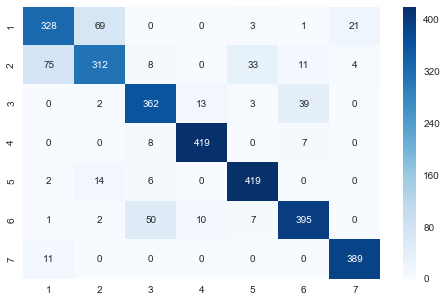

Base Random Forest

Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

           1       0.79      0.78      0.78       422
           2       0.78      0.70      0.74       443
           3       0.83      0.86      0.85       419
           4       0.95      0.97      0.96       434
           5       0.90      0.95      0.92       441
           6       0.87      0.85      0.86       465
           7       0.94      0.97      0.96       400

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [33]:
print_result("Base Random Forest",y_pred)

## Adaboosting
This algorithm was not very successful.

In [34]:
## import adaboosting here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
features = data_train.columns[:-1]

n_estimators = range(1,26)

grid_cv = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                             learning_rate=1),
                          param_grid = {'n_estimators':n_estimators}, 
                          scoring = 'accuracy', 
                          cv = 10)

grid_cv.fit(data_train[features], data_train.Cover_Type)

accs = np.zeros((10,len(n_estimators)))

for i in range(10):
    accs[i,:] = grid_cv.cv_results_['split' + str(i) + '_test_score']

In [ ]:
for i in range(10):
    accs[i,:] = grid_cv.cv_results_['split' + str(i) + '_test_score']

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(n_estimators,
            np.mean(accs, axis=0),
         '-o')

plt.xlabel("n_estimators", fontsize=18)
plt.ylabel("Avg. CV Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Our accuracy was only around 55%, so this method is not worth exploring much more.